In [1]:
from ultralytics import YOLO

In [4]:
model = YOLO("yolo11n-seg.pt")
results = model.train(data="data.yaml", epochs=80, imgsz=480, batch=8, seed=42)

Ultralytics 8.3.203  Python-3.13.4 torch-2.8.0+cpu CPU (AMD Ryzen 7 7735U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

In [6]:
from ultralytics import YOLO
new_model = YOLO("runs/segment/train3/weights/best.pt")
metrics = new_model.val()
print(metrics)

Ultralytics 8.3.203  Python-3.13.4 torch-2.8.0+cpu CPU (AMD Ryzen 7 7735U with Radeon Graphics)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 9.6 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 940.3151.8 MB/s, size: 1526.5 KB)
val: Scanning C:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\labels\val.cache... 10 images, 5 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 15/15 12.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.1it/s 7.0s
                   all         15         35      0.671      0.754      0.738      0.615      0.671      0.754      0.736      0.568
                person          5          9      0.488      0.778      0.674      0.625      0.488      0.778      0.673      0.616
               vehicle          8         26      0.853      0.731      0.801      0.605      0.853      0.731   

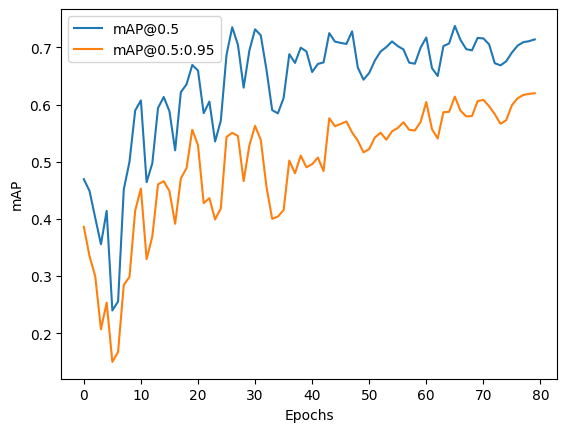

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/segment/train3/results.csv")

plt.plot(df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.legend()
plt.show()


In [10]:
from ultralytics import YOLO


model = YOLO("runs/segment/train3/weights/best.pt")  


results = model.predict("Datasets/mydataset/images/test", save=True, conf=0.25)


image 1/37 c:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\images\test\22.jpg: 320x480 3 persons, 154.3ms
image 2/37 c:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\images\test\23.jpg: 320x480 2 persons, 96.6ms
image 3/37 c:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\images\test\24.jpg: 480x320 2 vehicles, 166.2ms
image 4/37 c:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\images\test\25.jpg: 480x320 (no detections), 87.9ms
image 5/37 c:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\images\test\26.jpg: 480x320 1 person, 3 vehicles, 80.9ms
image 6/37 c:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\images\test\27.jpg: 480x320 3 persons, 87.2ms
image 7/37 c:\Users\akash\akash_rawal_1\Akash_rawal\Akash_rawal_4124\Datasets\mydataset\images\test\28.jpg: 480x320 5 persons, 89.1ms
image 8/37 c:\Users\akash\akash_rawal_1\A

In [11]:
import os, json, cv2
from tqdm import tqdm


categories = [
    {"id": 0, "name": "person"},
    {"id": 1, "name": "vehicle"}
]


coco = {"images": [], "annotations": [], "categories": categories}
ann_id = 1 

for img_id, result in enumerate(tqdm(results)):
    path = result.path
    file_name = os.path.basename(path)

   
    img = cv2.imread(path)
    h, w = img.shape[:2]

   
    coco["images"].append({
        "id": img_id,
        "file_name": file_name,
        "width": w,
        "height": h
    })

    
    if result.masks is not None:  
        masks = result.masks.xy  
        for seg, box, conf, cls in zip(
            masks,
            result.boxes.xywh.cpu().numpy(),
            result.boxes.conf.cpu().numpy(),
            result.boxes.cls.cpu().numpy()
        ):
            
            segmentation = [seg.flatten().tolist()]

           
            x, y, bw, bh = box
            bbox = [float(x - bw/2), float(y - bh/2), float(bw), float(bh)]

            
            area = float(bw * bh)

           
            category_id = int(cls)

            
            coco["annotations"].append({
                "id": ann_id,
                "image_id": img_id,
                "category_id": category_id,
                "bbox": bbox,
                "area": area,
                "segmentation": segmentation,
                "iscrowd": 0,
                "score": float(conf)
            })
            ann_id += 1

# conversion to json
out_json = "Datasets/mydataset/annotations/instances_test.json"
os.makedirs(os.path.dirname(out_json), exist_ok=True)

with open(out_json, "w") as f:
    json.dump(coco, f)

print(f"COCO instance segmentation file updated: {out_json}")


100%|██████████| 37/37 [00:15<00:00,  2.44it/s]

COCO instance segmentation file updated: Datasets/mydataset/annotations/instances_test.json
